# **E-COMMERCE CUSTOMER CHURN**

`Created by : Mary Amalia Wauran`

---
## **Business Problem Understanding**

### Context

Perusahaan electronic commerce (E-commerce) atau perdagangan elektronik adalah perusahaan yang melakukan kegiatan jual atau beli secara online dengan menggunakan internet. Perusahan e-commerce perlu melakukan evaluasi pelanggan untuk mengetahui customer churn pada perusahaan.


### Problem Statement

Sebuah perusahaan e-commerce ingin mengetahui customer churn atau pelanggan yang tidak menggunakan jasa perusahaan lagi, sehingga dapat menimbulkan kerugian bagi perusahaan. Oleh karena itu, perusahaan perlu melakukan prediksi terhadap customer, agar sebelum costumer benar-benar churn, perusahaan dapat menjangkau customer tersebut dengan memberikan layanan yang lebih baik, seperti memberikan promo yang menarik. Namun, sebaiknya promo diberikan kepada orang yang tepat. Dengan demikian, perusahaan dapat menghindari kerugian yang akan terjadi akibat kehilangan pelanggan.

### Goals

- Melakukan prediksi untuk mengetahui customer yang berpotensi melakukan churn, agar promosi yang diberikan perusahaan tepat sasaran.
- Mengetahui faktor-faktor yang mempengaruhi customer churn untuk menghindari kerugian pada perusahaan.

### Analytic Approach

- Menemukan pola yang membedakan antara customer yang melakukan churn dan yang tidak melakukan churn dengan cara menganalisis data yang ada pada perusahaan.
- Melakukan prediksi pada customer (churn atau tidak churn) dengan membuat model klasifikasi

### Metric Evaluation

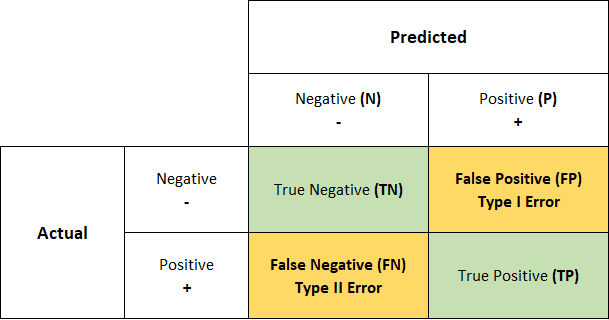

- **True Positive (TP)**: Customer diprediksi dan kenyataannya melakukan churn
- **False Positive (FP)**: Customer diprediksi melakukan churn, namun pada kenyataannya customer tidak melakukan churn
- **False Negative (FN)**: Customer diprediksi tidak melakukan churn, namun pada kenyataannya customer melakukan churn
- **True Negative (TN)**: Customer diprediksi dan kenyataannya tidak melakukan churn

Dalam melakukan prediksi, kesalahan yang dapat terjadi yaitu:

**Type 1 error**: False Positive 
- Action: Memberikan promosi dengan perkiraan cost sebesar *$150* per capita per tahun.
- Konsekuensi: Memberikan promo pada target yang salah, sehingga perusahaan mengeluarkan biaya yang tidak tepat

 **Type 2 error**: False Negative
- Action: Tidak memberi perhatian pada customer ini yang kita prediksi tidak akan melakukan churn, dan dapat memberikan profit kepada perusahan dengan perkiraan cost *$600* per capita per tahun.
- Konsekuensi: Perusahaan mengalami kerugian karena kehilangan customer yang memberikan profit bagi perusahaan

Berdasarkan dari kemungkinan kesalahan prediksi di atas, maka model yang dibuat harus dapat mengurangi kerugian perusahaan karena kehilangan customer atau menekan False Negative, namun tetap menjaga agar perusahaan tidak mengeluarkan biaya yang tidak tepat sasaran dalam memberikan promosi (False Positive). Oleh karena itu, metric utama yang digunakan yaitu `f2 score`.

F2 score adalah salah satu classification evaluation metrics yang mengukur akurasi model dengan mempertimbangkan trade-off antara precision dan recall. F2 score didasarkan pada nilai beta di mana beta lebih besar dari 1 memberikan lebih banyak penekanan pada recall daripada precision.
F2 score dapat digunakan untuk mengevaluasi performa model klasifikasi di mana kesalahan false negative lebih penting untuk dihindari daripada false positive.

### Dataset

**Dataset E-commerce Customer Churn**

Dataset milik perusahaan E-Commerce online terkemuka. Sebuah perusahaan ritel online (E-commerce) ingin mengetahui pelanggan yang akan melakukan churn, sehingga mereka dapat mendekati pelanggan untuk menawarkan beberapa promo.

- Sumber data asli : https://www.kaggle.com/datasets/ankitverma2010/ecommerce-customer-churn-analysis-and-prediction
- Pembuat data : Ankit Verma
- Tanggal : 16 Februari 2022

**Target and Features**

Target : 
- 0 : Customer yang tidak melakukan churn
- 1 : Customer yang melakukan churn

| Feature | Description |
| --- | --- |
| Tenure | Tenure of a customer in the company |
| WarehouseToHome | Distance between the warehouse to the customer’s home |
| NumberOfDeviceRegistered | Total number of devices is registered on a particular customer |
| PreferedOrderCat | Preferred order category of a customer in the last month |
| SatisfactionScore | Satisfactory score of a customer on service |
| MaritalStatus | Marital status of a customer |
| NumberOfAddress | Total number of address on a particular customer |
| Complaint | Any complaint has been raised in the last month |
| DaySinceLastOrder | Day since last order by customer |
| CashbackAmount | Average cashback in last month |


---
## **Data Understanding**

### Import Library

In [1]:
# Library
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display

# Feature Engineering
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder, RobustScaler, MinMaxScaler, StandardScaler
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.preprocessing import PolynomialFeatures

# Imbalance Dataset
from imblearn.pipeline import Pipeline
from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler, NearMiss

# Algorithm ML
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier

# Crossval
from sklearn.model_selection import RandomizedSearchCV, train_test_split, cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import fbeta_score, make_scorer

# Explainable ML
import shap

# Ignore Warning
import sys
import warnings
if not sys.warnoptions:
    warnings.simplefilter("ignore")

# Set max columns
pd.set_option('display.max_columns', None)

### Load Dataset

In [2]:
df = pd.read_csv("data_ecommerce_customer_churn.csv")
df.head()

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
0,15.0,29.0,4,Laptop & Accessory,3,Single,2,0,7.0,143.32,0
1,7.0,25.0,4,Mobile,1,Married,2,0,7.0,129.29,0
2,27.0,13.0,3,Laptop & Accessory,1,Married,5,0,7.0,168.54,0
3,20.0,25.0,4,Fashion,3,Divorced,7,0,NaN,230.27,0
4,30.0,15.0,4,Others,4,Single,8,0,8.0,322.17,0


### Explore Dataset

Mengetahui informasi jumlah data dan tipe data :

In [3]:
df.info()

# terdapat missing values dan jenis data numerikal (float64, int64) dan kategorikal (object)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3941 entries, 0 to 3940
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Tenure                    3747 non-null   float64
 1   WarehouseToHome           3772 non-null   float64
 2   NumberOfDeviceRegistered  3941 non-null   int64  
 3   PreferedOrderCat          3941 non-null   object 
 4   SatisfactionScore         3941 non-null   int64  
 5   MaritalStatus             3941 non-null   object 
 6   NumberOfAddress           3941 non-null   int64  
 7   Complain                  3941 non-null   int64  
 8   DaySinceLastOrder         3728 non-null   float64
 9   CashbackAmount            3941 non-null   float64
 10  Churn                     3941 non-null   int64  
dtypes: float64(4), int64(5), object(2)
memory usage: 338.8+ KB


Mengetahui ringkasan deskriptive statistics pada kolom numerikal dan kolom kategorikal :

In [4]:
display(df.describe(), df.describe(include='object'))

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
count,3747.000000,3772.000000,3941.000000,3941.000000,3941.000000,3941.000000,3728.000000,3941.000000,3941.000000
mean,10.081398,15.650583,3.679269,3.088302,4.237757,0.282416,4.531652,176.707419,0.171023
std,8.498864,8.452301,1.013938,1.381832,2.626699,0.450232,3.667648,48.791784,0.376576
min,0.000000,5.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,9.000000,3.000000,2.000000,2.000000,0.000000,2.000000,145.700000,0.000000
50%,9.000000,14.000000,4.000000,3.000000,3.000000,0.000000,3.000000,163.340000,0.000000
75%,16.000000,21.000000,4.000000,4.000000,6.000000,1.000000,7.000000,195.250000,0.000000
max,61.000000,127.000000,6.000000,5.000000,22.000000,1.000000,46.000000,324.990000,1.000000


,PreferedOrderCat,MaritalStatus
count,3941,3941
unique,6,3
top,Laptop & Accessory,Married
freq,1458,2055


Mengetahui missing value di tiap kolom :

In [5]:
df.isna().sum()

# terdapat missing values pada kolom Tenure, WarehouseToHome, DaySinceLastOrder

Tenure                      194
WarehouseToHome             169
NumberOfDeviceRegistered      0
PreferedOrderCat              0
SatisfactionScore             0
MaritalStatus                 0
NumberOfAddress               0
Complain                      0
DaySinceLastOrder           213
CashbackAmount                0
Churn                         0
dtype: int64

Mengetahui bentuk dataframe df :

In [6]:
df.shape

# terdapat 3941 baris dan 11 kolom

(3941, 11)

Mengetahui persentase data duplikat :

In [7]:
df.duplicated().sum() / len(df) * 100

# data duplikat hanya sebesar 17%

17.026135498604415

Menghapus data duplikat dan mengetahui bentuk dataframe df setelah data duplikat dihapus :

In [8]:
# Menghapus data duplikat
df = df.drop_duplicates()

# Mengetahui bentuk dataframe df setelah data duplikat dihapus
df.shape

# terdapat 3270 baris dan 11 kolom

(3270, 11)

Data unique di tiap kolom :

In [9]:
listItem = []
for col in df.columns :
    listItem.append( [col, df[col].nunique(), df[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,Tenure,36,"[15.0, 7.0, 27.0, 20.0, 30.0, 1.0, 11.0, 17.0,..."
1,WarehouseToHome,33,"[29.0, 25.0, 13.0, 15.0, 16.0, 11.0, 12.0, 7.0..."
2,NumberOfDeviceRegistered,6,"[4, 3, 6, 2, 5, 1]"
3,PreferedOrderCat,6,"[Laptop & Accessory, Mobile, Fashion, Others, ..."
4,SatisfactionScore,5,"[3, 1, 4, 2, 5]"
5,MaritalStatus,3,"[Single, Married, Divorced]"
6,NumberOfAddress,14,"[2, 5, 7, 8, 3, 1, 9, 4, 10, 11, 6, 19, 22, 21]"
7,Complain,2,"[0, 1]"
8,DaySinceLastOrder,22,"[7.0, nan, 8.0, 11.0, 2.0, 1.0, 4.0, 3.0, 6.0,..."
9,CashbackAmount,2335,"[143.32, 129.29, 168.54, 230.27, 322.17, 152.8..."


Mengetahui kolom kategorikal :

In [10]:
cat_features = [feature for feature in df.columns if (df[feature].dtypes == 'O')]
cat_features

# terdapat 2 kolom kategorikal

['PreferedOrderCat', 'MaritalStatus']

Mengetahui kolom numerikal :

In [11]:
num_features = [feature for feature in df.columns if ((df[feature].dtypes != 'O') & (feature not in ['Churn']))]
num_features

# terdapat 8 kolom kategorikal

['Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'Complain',
 'DaySinceLastOrder',
 'CashbackAmount']

Mengetahui jumlah kategori dan unique value dari kolom kategorikal :

In [12]:
for i in cat_features:
    print(f'Total unique values in {i}: ', df[i].nunique())
    print(f'Unique values: ', df[i].unique())
    print()

Total unique values in PreferedOrderCat:  6
Unique values:  ['Laptop & Accessory' 'Mobile' 'Fashion' 'Others' 'Mobile Phone' 'Grocery']

Total unique values in MaritalStatus:  3
Unique values:  ['Single' 'Married' 'Divorced']



Mengubah kategori Mobile menjadi Mobile Phone pada kolom PreferedOrderCat :

In [13]:
df['PreferedOrderCat'] = df['PreferedOrderCat'].replace({'Mobile':'Mobile Phone'})

Kategori Mobile sudah tidak ada, kolom PreferedOrderCat dari 6 kategori menjadi 5 kategori :

In [14]:
df['PreferedOrderCat'].value_counts()

Laptop & Accessory    1213
Mobile Phone          1183
Fashion                484
Grocery                241
Others                 149
Name: PreferedOrderCat, dtype: int64

Mengetahui outlier pada kolom numerikal menggunakan boxplot :

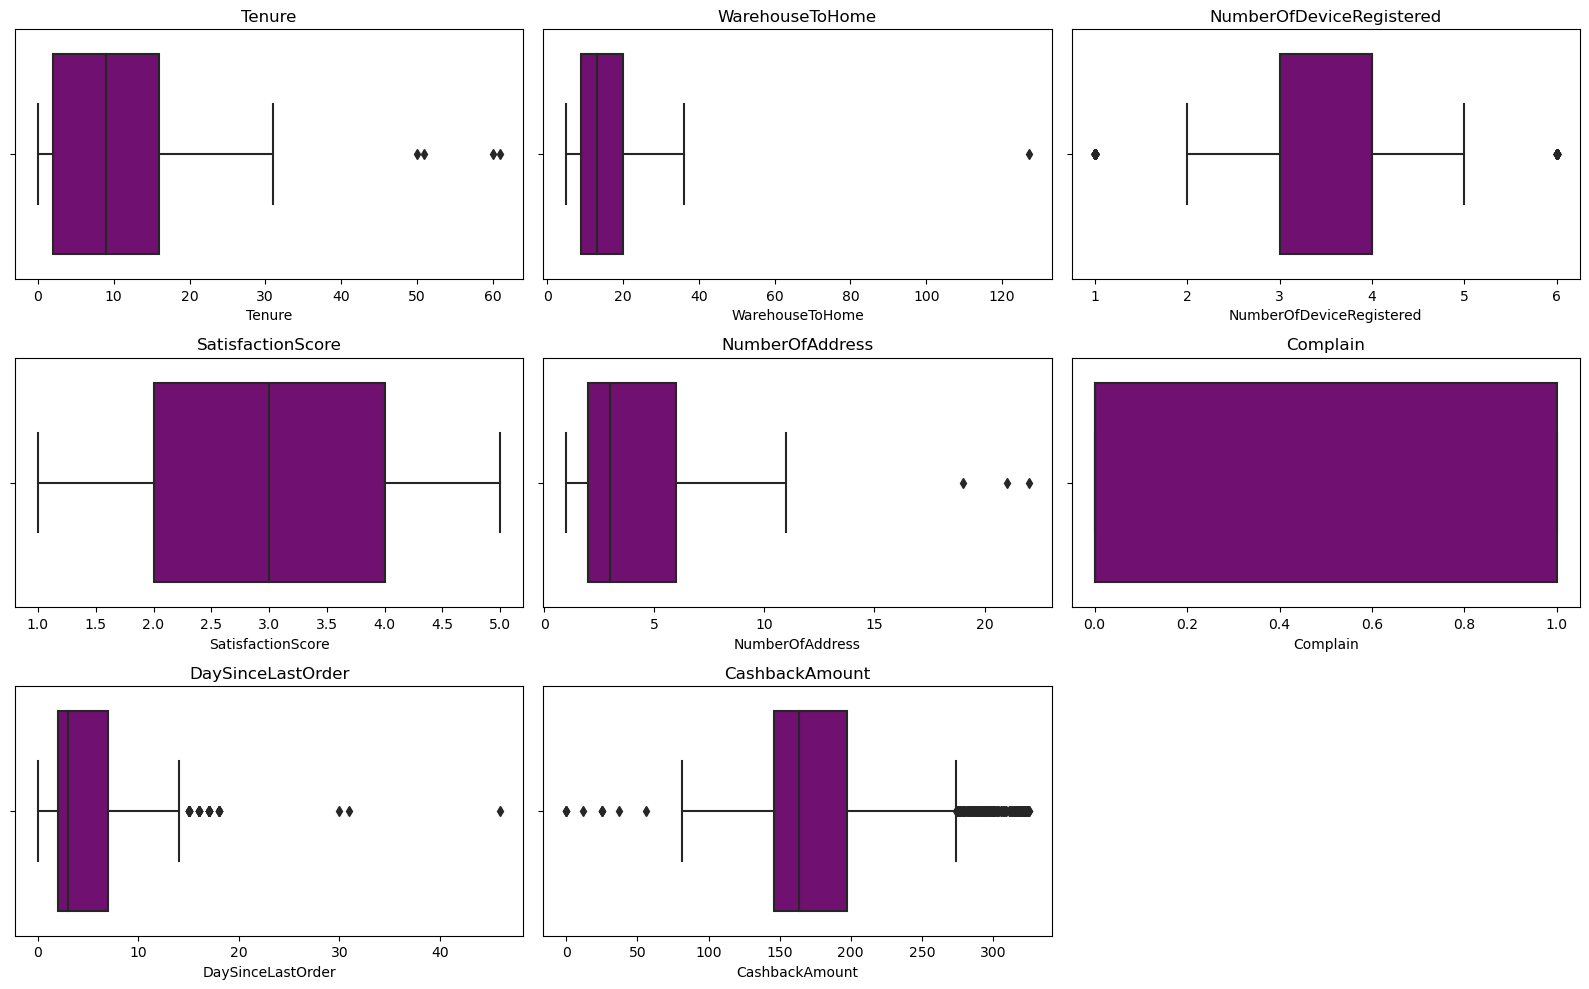

In [15]:
col_names = num_features
plotnumber = 1
plt.figure(figsize=(16,10))

for kolom in col_names:
    plt.subplot(3,3, plotnumber)
    sns.boxplot(data=df, x=kolom, color='purple')
    plt.title(kolom)
    plt.tight_layout()

    plotnumber += 1

Berdasarkan boxplot di atas, diketahui bahwa dataset memiliki data yang outliers, namun oleh karena data dianggap masih wajar atau bukan data error, maka data tersebut tidak dihapus, dan masih bisa digunakan. Disamping itu juga, data-data ouliers tersebut dapat membantu model agar dapat belajar dari data yang bervariasi.

Mengetahui hubungan antar categorical features:

In [16]:
df.corr()[0:8]

# antar feature tidak ada yang memiliki hubungan yang kuat 
# seluruh feature memiliki nilai correlation < 0.5

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,SatisfactionScore,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount,Churn
Tenure,1.000000,-0.028010,-0.041742,-0.029982,0.227957,-0.020666,0.170329,0.464551,-0.348654
WarehouseToHome,-0.028010,1.000000,0.015884,0.007628,-0.010757,0.046227,0.018332,-0.006126,0.074237
NumberOfDeviceRegistered,-0.041742,0.015884,1.000000,-0.010991,0.076437,0.005338,0.010831,0.120136,0.109612
SatisfactionScore,-0.029982,0.007628,-0.010991,1.000000,0.042449,-0.035167,0.039855,0.006499,0.098393
NumberOfAddress,0.227957,-0.010757,0.076437,0.042449,1.000000,-0.011490,-0.062229,0.186623,0.046354
Complain,-0.020666,0.046227,0.005338,-0.035167,-0.011490,1.000000,-0.052269,-0.002040,0.262278
DaySinceLastOrder,0.170329,0.018332,0.010831,0.039855,-0.062229,-0.052269,1.000000,0.340341,-0.147918
CashbackAmount,0.464551,-0.006126,0.120136,0.006499,0.186623,-0.002040,0.340341,1.000000,-0.151475


Melihat distribusi data untuk mengetahui apakah data berdistribusi normal atau tidak :

Text(0.5, 0.98, 'Frequency Distribution of Tenure, Warehouse to Home, Day Since Last Order')

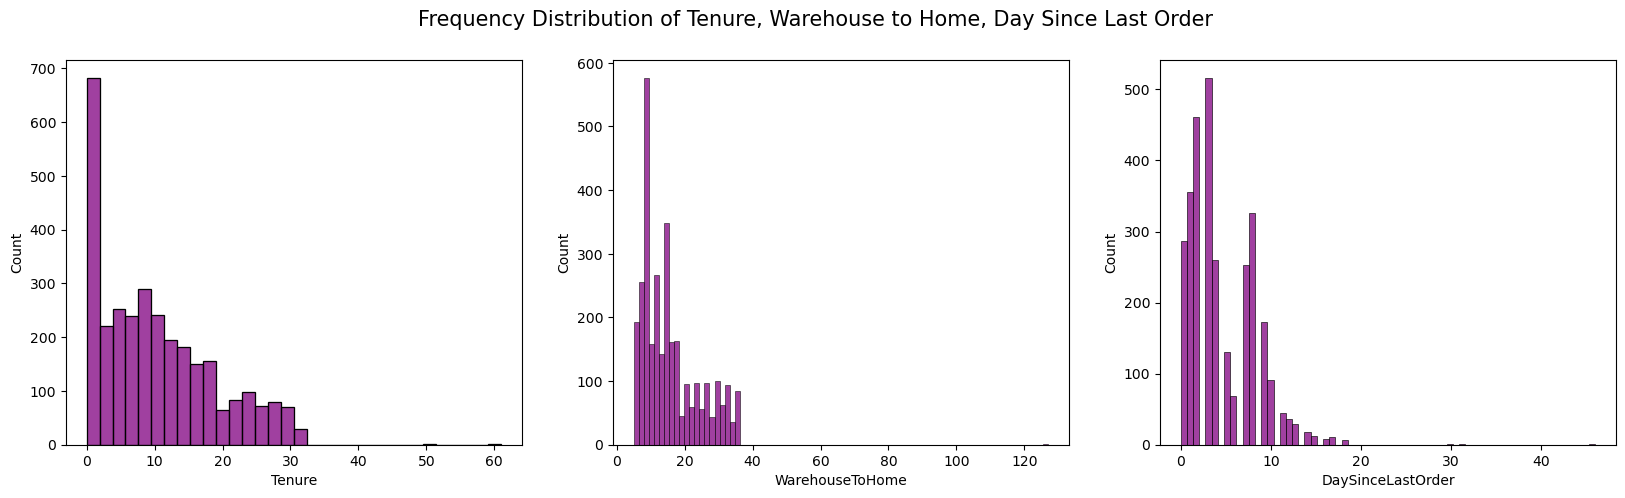

In [17]:
plt.figure(figsize=(20,5))

plt.subplot(1,3,1)
sns.histplot(data=df, x='Tenure', color='purple')

plt.subplot(1,3,2)
sns.histplot(data=df, x='WarehouseToHome', color='purple')

plt.subplot(1,3,3)
sns.histplot(data=df, x='DaySinceLastOrder', color='purple')

plt.suptitle('Frequency Distribution of Tenure, Warehouse to Home, Day Since Last Order', size= 15)

# Tenure, WarehouseToHome, DaySinceLastOrder tidak berdistribusi normal

Mengetahui proporsi target (Churn) :

In [18]:
print(df['Churn'].value_counts())
print()

# persentase
print(df['Churn'].value_counts()/len(df['Churn'])*100)

0    2736
1     534
Name: Churn, dtype: int64

0    83.669725
1    16.330275
Name: Churn, dtype: float64


Berdasarkan sumber : https://developers.google.com/machine-learning/data-prep/construct/sampling-splitting/imbalanced-data diketahui bahwa target pada dataset ini memiliki proportion of minority class sebesar 16.3% sehingga tergolong **Moderate Imbalance**


---
## **Data Splitting**

Data splitting adalah salah satu teknik yang penting dalam machine learning untuk meningkatkan kinerja model dan mencegah overfitting, dengan membagi dataset menjadi dua atau lebih bagian untuk tujuan tertentu, seperti pelatihan model, validasi model, dan pengujian model. 

Fungsi dari data splitting adalah untuk mengevaluasi kinerja model dengan menggunakan data yang tidak digunakan dalam pelatihan model, memilih parameter terbaik model dan memvalidasi model yang telah dilatih. 

Dataset dibagi menjadi tiga bagian yaitu dataset pelatihan, dataset validasi, dan dataset pengujian. Dataset pelatihan digunakan untuk melatih model, dataset validasi digunakan untuk memilih parameter terbaik untuk model, dan dataset pengujian digunakan untuk menguji kinerja model secara akhir. Hal ini membantu menghindari overfitting, di mana model terlalu kompleks dan tidak mampu menggeneralisasi dengan baik pada data yang belum pernah dilihat sebelumnya.

Define X (features) dan y (target) :

In [19]:
# features
X = df.drop(columns=['Churn'])

# target
y = df['Churn']

Data Splitting :

In [20]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, stratify=y)

# data train = 80%
# data test = 20%

---
## **Preprocessing**

Langkah-langkah dalam proses preprocessing yaitu dengan **impute missing values** (mengisi data yang kosong), **scaling** (melakukan transformasi terhadap data numerik agar antar variabel memiliki skala yang sama), **encoding** (mengubah data kategorikal menjadi data numerikal), dan **polynomial features** yaitu:

**Impute Missing Values**

Menggunakan Simple Imputer dengan nilai Median: *'Tenure', 'WarehouseToHome', 'DaySinceLastOrder'*

Pada tahap explore data di atas, diketahui bahwa pada feature 'Tenure', 'WarehouseToHome' dan 'DaySinceLastOrder' terdapat missing values dan datanya tidak berdistribusi normal, sehingga imputasi dilakukan menggunakan nilai Median. Kolom tersebut juga tergolong numerical features yang tidak memiliki hubungan antar features lainnya, terbukti dari nilai corr < 0.5, sehingga imputasi dilakukan menggunakan metode Simple Imputer, dan tidak memanfaatkan feature lainnya untuk memprediksi missing values.

**Scaling**

Menggunakan Robust Scaler: *'Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount'*

Numerical features di atas memiliki data outliers sehingga dapat menggunakan Robust Scaler yang bisa menghandle data outliers. Feature 'Complain' memiliki data 0 dan 1, sehingga tidak perlu dilakukan scaling lagi. 

**Encoding**

Menggunakan One Hot Encoder: *'PreferedOrderCat', 'MaritalStatus'*

Pada tahap explore data di atas, diketahui bahwa data pada feature 'PreferedOrderCat' dan 'MaritalStatus' merupakan data kategorikal, sehingga perlu dilakukan encoding untuk mengubah data menjadi numerikal. Encoding dilakukan menggunakan metode One Hot Encoder karena categorical features tersebut tidak memiliki tingkatan/urutan/tidak ordinal dan memiliki unique data yang sedikit. Feature 'PreferedOrderCat' memiliki 5 unique data, dan feature 'MaritalStatus' memiliki 3 unique data.

**Polynomial**

Melakukan polynomial dengan mengubah features menjadi polinomial yang lebih tinggi, sehingga diharapkan dapat meningkatkan kinerja model.

In [21]:
pipe_impute_robust = Pipeline([
    ('median', SimpleImputer(strategy='median')),
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', RobustScaler())
])

In [22]:
transformer = ColumnTransformer([
    ('pipe_impute_robust', pipe_impute_robust, ['Tenure', 'WarehouseToHome', 'NumberOfDeviceRegistered', 'SatisfactionScore', 'NumberOfAddress', 'DaySinceLastOrder', 'CashbackAmount']),
    ('onehot', OneHotEncoder(drop='first'), ['PreferedOrderCat', 'MaritalStatus'])
], remainder='passthrough')

transformer

ColumnTransformer(remainder='passthrough',
                  transformers=[('pipe_impute_robust',
                                 Pipeline(steps=[('median',
                                                  SimpleImputer(strategy='median')),
                                                 ('poly', PolynomialFeatures()),
                                                 ('scaler', RobustScaler())]),
                                 ['Tenure', 'WarehouseToHome',
                                  'NumberOfDeviceRegistered',
                                  'SatisfactionScore', 'NumberOfAddress',
                                  'DaySinceLastOrder', 'CashbackAmount']),
                                ('onehot', OneHotEncoder(drop='first'),
                                 ['PreferedOrderCat', 'MaritalStatus'])])

---
## **Benchmark Model**

In [23]:
# algoritma ML
logreg = LogisticRegression(random_state=0, class_weight='balanced')
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(random_state=0, class_weight='balanced') 
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 
ada = AdaBoostClassifier(tree, random_state=0)
gbc = GradientBoostingClassifier(random_state=0)
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

In [24]:
# resampler
smote = SMOTE(random_state=0)
nearmiss = NearMiss()
rus = RandomUnderSampler(random_state=0)
ros = RandomOverSampler(random_state=0)

In [25]:
models = [logreg, knn, tree, rf, ada, gbc, xgbc]
score = []
list_mean = []
list_std = []

# evaluation matrics f2 score
f2_score = make_scorer(fbeta_score, beta=2)

# mencari algoritma terbaik dengan melihat nilai mean dan standar deviasi dari f2 score
for i in models:

    pipe_model = Pipeline([
        ('transformer', transformer),
        ('resampler', smote),
        ('model', i)
    ])

    model_cv = cross_val_score(
        estimator = pipe_model, 
        X= X_train, 
        y= y_train, 
        cv=5, 
        scoring= f2_score, 
        error_score='raise'
        )

    score.append(model_cv)
    list_mean.append(model_cv.mean())
    list_std.append(model_cv.std())

In [26]:
# membuat data frame mean dan std dari setiap algoritma yang dilooping
df_cv = pd.DataFrame({
    'model':['logreg', 'knn', 'tree', 'rf',' ada', 'gbc', 'xgbc'],
    'mean':list_mean,
    'std':list_std
})

# mengurutkan berdasarkan nilai mean yang paling tinggi
df_cv.sort_values(by='mean', ascending=False)

,model,mean,std
6,xgbc,0.702951,0.049426
3,rf,0.700508,0.050153
1,knn,0.686803,0.027228
0,logreg,0.679519,0.034009
5,gbc,0.655757,0.021264
2,tree,0.648167,0.037082
4,ada,0.635699,0.061845


Berdasarkan DataFrame df_cv diatas, diketahui bahwa dari enam algoritma yang dilooping, algoritma `XGBoost Classifier` dan `Random Forest` adalah algoritma terbaik, terlihat dari mean dan juga cukup stabil. Oleh karena itu, dua algoritma tersebut kemudian akan dituning agar mendapatkan parameter terbaiknya menggunakan metrics f2 score.

---
## **Hyperparameter Tuning**

Hyperparameter tuning dilakukan untuk meningkatkan performa model dengan mencari konfigurasi hyperparameter yang optimal.

Fungsi dari hyperparameter tuning adalah:

- Meningkatkan performa model: Dengan menentukan hyperparameter yang optimal, model dapat menjadi lebih akurat dan efisien.

- Menghindari overfitting dan underfitting: Dengan menentukan hyperparameter yang tepat, model dapat menghindari overfitting (terlalu cocok dengan data latih) atau underfitting (tidak cocok dengan data latih).

- Meningkatkan generalisasi: Dengan menentukan hyperparameter yang optimal, model dapat meningkatkan kemampuan untuk memprediksi data yang tidak terlihat (data uji atau data baru).

- Menghemat waktu dan biaya: Dengan menentukan hyperparameter yang optimal, waktu dan biaya yang diperlukan untuk melatih model dapat dikurangi.

Hyperparameter tuning yang akan dilakukan menggunakan `Random Search` dengan cara memilih hyperparameter secara acak dari rentang nilai yang ditentukan, untuk mencari set hyperparameter terbaik untuk model yang digunakan.

### XGBoost Classifier

Tuning Pertama

In [27]:
# Hyperparam space XGboost
hyperparam_space_xgbc = {
    'balancing':[smote, rus, ros, nearmiss, None],
    'model__max_depth': list(np.arange(1,100,2)), 
    'model__learning_rate': list(np.arange(0.01, 1.0, 0.01)),
    'model__n_estimators': list(np.arange(50,100,2)),
    'model__subsample': list(np.arange(0.1, 1.0, 0.1)),
    'model__colsample_bytree': list(np.arange(0.1, 1.0, 0.1)),
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2,3]
}

In [28]:
# Benchmark model 1
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

# Create the algorithm chains
pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', xgbc)
        ])

# Hyperparameter tuning
random_xgbc = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions = hyperparam_space_xgbc, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter= 1000
)

In [29]:
# fitting
random_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                           

In [30]:
# create dataframe
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__subsample,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
973,0.224111,0.005703,0.017023,0.003418,RobustScaler(),1,0.7,90,45,0.1,0.7,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.821355,0.751029,0.744681,0.734694,0.784114,0.767175,0.031762,1
552,1.168212,0.048628,0.018349,0.003135,RobustScaler(),1,0.8,78,89,0.06,0.7,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.807175,0.727700,0.753589,0.770115,0.776471,0.767010,0.026221,2
209,0.400161,0.024788,0.020913,0.003057,RobustScaler(),2,0.8,74,59,0.23,0.6,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.771543,0.757576,0.756303,0.712810,0.833333,0.766313,0.038880,3
556,0.662783,0.015089,0.015411,0.006423,StandardScaler(),1,0.6,56,47,0.36,0.7,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.800915,0.742925,0.736715,0.749415,0.794931,0.764980,0.027262,4
453,0.624113,0.009796,0.019997,0.003550,StandardScaler(),2,0.9,90,51,0.09,0.8,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.797980,0.755694,0.738397,0.740741,0.791075,0.764777,0.025101,5


In [31]:
print('XGBoost')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBoost
Best_score: 0.7671745648583999
Best_params: {'transformer__pipe_impute_robust__scaler': RobustScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__subsample': 0.7000000000000001, 'model__n_estimators': 90, 'model__max_depth': 45, 'model__learning_rate': 0.09999999999999999, 'model__colsample_bytree': 0.7000000000000001, 'balancing': RandomUnderSampler(random_state=0)}


Tuning Kedua

In [32]:
# Hyperparam space XGboost
hyperparam_space_xgbc = {
    'balancing':[rus, ros],
    'model__max_depth': list(np.arange(35,110,1)), 
    'model__learning_rate': list(np.arange(0.1, 0.5, 0.05)),
    'model__n_estimators': list(np.arange(50,100,1)),
    'model__subsample': list(np.arange(0.5, 1.0, 0.05)),
    'model__colsample_bytree': list(np.arange(0.5, 1.0, 0.05)),
    'transformer__pipe_impute_robust__scaler': [StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2]
}

In [33]:
# Benchmark model 1
xgbc = XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

# Create the algorithm chains
pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', xgbc)
        ])

# Hyperparameter tuning
random_xgbc = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions = hyperparam_space_xgbc, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter= 1000
)

In [34]:
# fitting
random_xgbc.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                           

In [35]:
# create dataframe
pd.DataFrame(random_xgbc.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__subsample,param_model__n_estimators,param_model__max_depth,param_model__learning_rate,param_model__colsample_bytree,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
704,0.187512,0.008382,0.018595,0.005375,StandardScaler(),1,0.95,78,105,0.35,0.7,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.797546,0.786164,0.774194,0.757576,0.774793,0.778054,0.013346,1
276,0.594303,0.014057,0.019352,0.003669,StandardScaler(),2,0.95,96,76,0.15,0.8,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.797980,0.766046,0.730689,0.773196,0.802846,0.774151,0.025872,2
11,0.231859,0.022209,0.021053,0.003744,StandardScaler(),1,0.9,83,109,0.15,0.85,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.804829,0.757261,0.752119,0.772358,0.781893,0.773692,0.018836,3
483,0.209468,0.003395,0.015063,0.002557,StandardScaler(),1,0.95,71,94,0.1,0.75,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.809717,0.757261,0.734043,0.769231,0.797546,0.773559,0.027308,4
543,0.429539,0.008524,0.017190,0.000636,StandardScaler(),2,0.95,85,40,0.15,0.6,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': St...,0.791075,0.759754,0.755319,0.758197,0.802469,0.773363,0.019502,5


In [36]:
print('XGBoost')
print('Best_score:', random_xgbc.best_score_)
print('Best_params:', random_xgbc.best_params_)

XGBoost
Best_score: 0.7780544457350247
Best_params: {'transformer__pipe_impute_robust__scaler': StandardScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__subsample': 0.9500000000000004, 'model__n_estimators': 78, 'model__max_depth': 105, 'model__learning_rate': 0.3500000000000001, 'model__colsample_bytree': 0.7000000000000002, 'balancing': RandomUnderSampler(random_state=0)}


Algoritma XGBoost dilakukan tuning sebanyak 2 kali. Tuning pertama berhasil meningkatkan best score model dari model yang dibuat sebelum dilakukan tuning. Tuning kedua dilakukan dengan mempersempit range dari parameter yang ada, menyesuaikan dari best params hasil tuning pertama. Best score hasil tuning kedua pun mengalami peningkatan.

### Random Forest

Tuning Pertama

In [37]:
# Hyperparam space Random Forest
hyperparam_space_rf = {
    'balancing':[smote, rus, ros, nearmiss, None],
    'model__max_depth': list(np.arange(1,100,2)), 
    'model__n_estimators': list(np.arange(1,100,2)),
    'model__max_features': ['auto', 'sqrt', 'log2'],
    'model__min_samples_leaf': list(np.arange(1,100,2)),
    'model__min_samples_split': list(np.arange(1,100,2)),
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), StandardScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2,3]
}

In [38]:
# Benchmark model 2
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 

# Create the algorithm chains
pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', rf)
        ])

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions = hyperparam_space_rf, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter= 1000
)

In [39]:
# fitting
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                           

In [40]:
# create dataframe
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.096263,0.000123,0.018835,0.003203,MinMaxScaler(),3,21,89,35,auto,25,RandomUnderSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.680851,0.630252,0.676533,0.655391,0.625000,0.653605,0.022956,-2147483648
658,0.063998,0.007486,0.015428,0.004581,MinMaxScaler(),2,5,43,21,auto,23,None,{'transformer__pipe_impute_robust__scaler': Mi...,0.744235,0.670860,0.712766,0.685654,0.700637,0.702830,0.025040,-2147483648
659,0.579087,0.039531,0.035633,0.003491,RobustScaler(),2,81,99,27,auto,51,None,{'transformer__pipe_impute_robust__scaler': Ro...,0.721868,0.637149,0.694143,0.689278,0.700837,0.688655,0.028053,-2147483648
660,0.566013,0.027530,0.034406,0.001372,RobustScaler(),1,89,97,7,auto,45,SMOTE(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.717345,0.688172,0.691145,0.702128,0.756303,0.711018,0.024846,-2147483648
661,0.085813,0.011152,0.016413,0.000429,MinMaxScaler(),1,11,87,81,auto,65,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.724638,0.643154,0.684211,0.663900,0.670860,0.677352,0.027113,-2147483648


In [41]:
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: 0.6536054109467097
Best_params: {'transformer__pipe_impute_robust__scaler': MinMaxScaler(), 'transformer__pipe_impute_robust__poly__degree': 3, 'model__n_estimators': 21, 'model__min_samples_split': 89, 'model__min_samples_leaf': 35, 'model__max_features': 'auto', 'model__max_depth': 25, 'balancing': RandomUnderSampler(random_state=0)}


Tuning Kedua

In [42]:
# Hyperparam space Random Forest
hyperparam_space_rf = {
    'balancing':[smote, rus, ros, None],
    'model__max_depth': list(np.arange(15,80,1)), 
    'model__n_estimators': list(np.arange(1,100,1)),
    'model__max_features': ['auto'],
    'model__min_samples_leaf': list(np.arange(1,85,1)),
    'model__min_samples_split': list(np.arange(35,120,1)),
    'transformer__pipe_impute_robust__scaler': [MinMaxScaler(), RobustScaler()],
    'transformer__pipe_impute_robust__poly__degree': [1,2,3]
}

In [43]:
# Benchmark model 2
rf = RandomForestClassifier(random_state=0, class_weight='balanced') 

# Create the algorithm chains
pipe_model = Pipeline([
        ('transformer', transformer),
        ('balancing', smote), 
        ('model', rf)
        ])

# Hyperparameter tuning
random_rf = RandomizedSearchCV(
    estimator = pipe_model, 
    param_distributions = hyperparam_space_rf, 
    cv = 5, 
    scoring = f2_score, 
    n_jobs = -1,  
    random_state=0,
    n_iter= 1000
)

In [44]:
# fitting
random_rf.fit(X_train, y_train)

RandomizedSearchCV(cv=5,
                   estimator=Pipeline(steps=[('transformer',
                                              ColumnTransformer(remainder='passthrough',
                                                                transformers=[('pipe_impute_robust',
                                                                               Pipeline(steps=[('median',
                                                                                                SimpleImputer(strategy='median')),
                                                                                               ('poly',
                                                                                                PolynomialFeatures()),
                                                                                               ('scaler',
                                                                                                RobustScaler())]),
                                           

In [45]:
# create dataframe
pd.DataFrame(random_rf.cv_results_).sort_values(by='rank_test_score').head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_transformer__pipe_impute_robust__scaler,param_transformer__pipe_impute_robust__poly__degree,param_model__n_estimators,param_model__min_samples_split,param_model__min_samples_leaf,param_model__max_features,param_model__max_depth,param_balancing,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
57,0.393026,0.030336,0.032621,0.009022,MinMaxScaler(),1,69,57,5,auto,40,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.778252,0.718816,0.741935,0.752688,0.759494,0.750237,0.019661,1
884,0.475377,0.008045,0.036568,0.004980,MinMaxScaler(),1,89,41,9,auto,27,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.783262,0.717345,0.725108,0.737527,0.769231,0.746495,0.025520,2
866,0.215586,0.012702,0.023352,0.001245,MinMaxScaler(),1,38,54,13,auto,60,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Mi...,0.762004,0.702128,0.731183,0.748945,0.741525,0.737157,0.020190,3
750,0.440504,0.018695,0.041673,0.004262,MinMaxScaler(),1,99,37,6,auto,23,None,{'transformer__pipe_impute_robust__scaler': Mi...,0.750529,0.715789,0.720430,0.761803,0.736515,0.737013,0.017452,4
926,0.426651,0.012012,0.032463,0.006138,RobustScaler(),1,81,54,25,auto,46,RandomOverSampler(random_state=0),{'transformer__pipe_impute_robust__scaler': Ro...,0.758836,0.703782,0.723542,0.742678,0.751566,0.736081,0.020008,5


In [46]:
print('Random Forest')
print('Best_score:', random_rf.best_score_)
print('Best_params:', random_rf.best_params_)

Random Forest
Best_score: 0.7502369987200906
Best_params: {'transformer__pipe_impute_robust__scaler': MinMaxScaler(), 'transformer__pipe_impute_robust__poly__degree': 1, 'model__n_estimators': 69, 'model__min_samples_split': 57, 'model__min_samples_leaf': 5, 'model__max_features': 'auto', 'model__max_depth': 40, 'balancing': RandomOverSampler(random_state=0)}


Algoritma Random Forest dilakukan tuning sebanyak 2 kali. Tuning pertama berhasil meningkatkan best score model dari model yang dibuat sebelum dilakukan tuning. Tuning kedua dilakukan dengan mempersempit range dari parameter yang ada, dan ternyata berhasil meningkatkan best score dari hasil tuning pertama.

### Best Model

Perbandingan best score XGBoost dan Random Forest, sebelum dan setelah tuning :

In [47]:
print(df_cv[df_cv['model']=='xgbc']['mean'].values[0], 'XGBoost Benchmark')
print(random_xgbc.best_score_, 'XGBoost Tuning')

print(df_cv[df_cv['model']=='rf']['mean'].values[0], 'Random Forest Benchmark')
print(random_rf.best_score_, 'Random Forest Tuning')

0.7029514708324666 XGBoost Benchmark
0.7780544457350247 XGBoost Tuning
0.7005077951092336 Random Forest Benchmark
0.7502369987200906 Random Forest Tuning


Berdasarkan dari dua algoritma yang sudah dilakukan tuning, ternyata setelah dilakukan tuning dua kali, algoritma XGBoost memiliki best score yang lebih tinggi dibandingkan dengan algoritma Random Forest. Oleh karena itu, kita akan lanjut ke proses modeling ke test set dengan menggunakan algoritma `XGBoost`.

Parameter terbaik XGBoost dengan tuning kedua :
- transformer__pipe_impute_robust__scaler : StandardScaler()
- transformer__pipe_impute_robust__poly__degree : 1
- model__subsample : 0.9500000000000004
- model__n_estimators : 78
- model__max_depth : 105
- model__learning_rate : 0.3500000000000001
- model__colsample_bytree : 0.7000000000000002
- balancing : RandomUnderSampler(random_state=0)


---
## **Performance in Test Set**

XGBoost (Extreme Gradient Boosting) merupakan algoritma machine learning populer yang digunakan untuk masalah klasifikasi, regresi, dan ranking. XGBoost adalah library gradient boosting yang dioptimalkan dan dirancang untuk efisien, fleksibel, dan mudah dipindahkan.

XGBoost adalah tipe model ensemble yang menggunakan kombinasi dari model yang lemah untuk membuat model yang kuat. Model yang lemah biasanya berupa decision tree, yang dibuat secara berurutan dalam proses yang disebut boosting. Selama boosting, setiap tree baru mencoba untuk memperbaiki kesalahan dari tree sebelumnya, sehingga model secara bertahap menjadi lebih akurat.

Berikut adalah cara kerja XGBoost untuk klasifikasi:

- Persiapan data: XGBoost memerlukan data input dalam format tertentu. Data harus dalam format matriks, di mana setiap baris mewakili sebuah instance dan setiap kolom mewakili sebuah fitur. Variable target harus berupa variabel biner atau kategori.

- Model awal: Decision tree pertama dibuat menggunakan data latih. Tree ini dikenal sebagai model dasar.

- Perhitungan residual: Residual dihitung dengan mengurangi nilai target yang diprediksi dari nilai target yang sebenarnya. Residual ini digunakan sebagai variable target untuk decision tree berikutnya.

- Gradient boosting: Decision tree berikutnya dibuat untuk memperbaiki kesalahan dari decision tree sebelumnya. Tree baru dilatih pada residual dari tree sebelumnya.

- Tree pruning: Decision tree dipangkas untuk mencegah overfitting. Ini dilakukan dengan menetapkan jumlah sampel minimum yang diperlukan di node daun.

- Prediksi: Setelah semua decision tree dibuat, prediksi akhir dilakukan dengan menambahkan prediksi dari semua tree. Nilai yang diprediksi adalah kelas dengan probabilitas tertinggi.

- Regularisasi: XGBoost menggunakan teknik regularisasi untuk mencegah overfitting. Term regularisasi ditambahkan ke fungsi objektif yang sedang dioptimalkan.

- Penyetelan Hyperparameter: XGBoost memiliki banyak hyperparameter yang dapat disesuaikan untuk meningkatkan performa model. Hyperparameter ini termasuk learning rate, number of trees, maximum depth of the trees, minimum number of samples required to be at a leaf node, dan masih banyak lagi.

- XGBoost dikenal karena kecepatan dan akurasinya, dan telah memenangkan beberapa kompetisi machine learning.

Hyperparameter yang dilakukan tuning di atas yaitu:

- max_depth: Menentukan kedalaman maksimum setiap pohon. Semakin besar nilai ini, semakin kompleks modelnya dan semakin lama waktu trainingnya. Namun, nilai yang terlalu kecil dapat mengakibatkan overfitting.

- learning_rate: Menentukan seberapa cepat model belajar. Semakin kecil nilai ini, semakin lambat model belajar dan semakin akurat hasilnya. Namun, semakin kecil nilai ini, semakin lama waktu training.

- n_estimators: Jumlah tree (pohon) yang akan dibuat dalam algoritma. Semakin besar nilai ini, semakin kompleks modelnya dan semakin lama waktu trainingnya.

- subsample: Menentukan proporsi sampel data yang digunakan untuk setiap tree. Semakin kecil nilai ini, semakin sedikit data yang digunakan, dan semakin cepat waktu training. Namun, semakin kecil nilai ini, semakin besar kemungkinan overfitting.

- colsample_bytree: Menentukan proporsi fitur (kolom) yang digunakan untuk setiap tree. Semakin kecil nilai ini, semakin sedikit fitur yang digunakan, dan semakin cepat waktu training. Namun, semakin kecil nilai ini, semakin besar kemungkinan underfitting.

### Before Hyperparameter Tuning

In [48]:
model= XGBClassifier(random_state=0, verbosity=0, class_weight='balanced')

model_pipe = Pipeline([
    ('transformer', transformer),
    ('resampler', smote),
    ('model', model)
])

# fitting
model_pipe.fit(X_train, y_train)

# predict
y_pred = model_pipe.predict(X_test)

# f2 score score
f2score_xgbc_benchmark = fbeta_score(y_test, y_pred, beta=2)
f2score_xgbc_benchmark

0.707635009310987

### After Hyperparameter Tuning

In [49]:
# best model
xgbc_tuning = random_xgbc.best_estimator_

# fitting
xgbc_tuning.fit(X_train, y_train)

# predict
y_pred_xgbc_tuning = xgbc_tuning.predict(X_test)

# f2 score
f2score_xgbc_tuning = fbeta_score(y_test, y_pred_xgbc_tuning, beta=2)
f2score_xgbc_tuning

0.7894736842105262

In [50]:
print(f2score_xgbc_benchmark, 'XGboost Benchmark')
print(f2score_xgbc_tuning, 'XGboost Tuning')

0.707635009310987 XGboost Benchmark
0.7894736842105262 XGboost Tuning


### Confusion Matrix

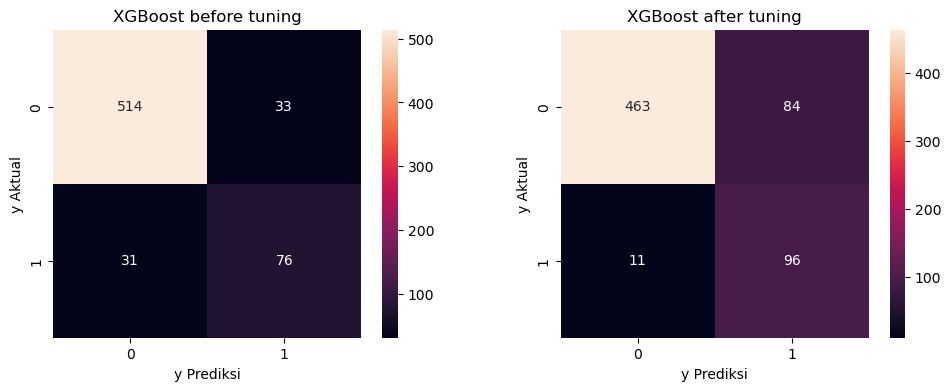

In [51]:
plt.figure(figsize=(12,4))

# Model XGBoost before tuning
plt.subplot(1,2,1)
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost before tuning')

# Model XGBoost after tuning
plt.subplot(1,2,2)
sns.heatmap(confusion_matrix(y_test, y_pred_xgbc_tuning), annot=True, fmt='.0f', square=True)
plt.xlabel('y Prediksi')
plt.ylabel('y Aktual')
plt.title('XGBoost after tuning');

Tujuan dari project ini adalah untuk mengetahui prediksi seorang customer apakah akan melakukan churn atau tidak menggunakan jasa perusahaan e-commerce ini lagi. Berdasarkan business problem di atas, diketahui bahwa:

- Model memiliki kemungkinan prediksi yang benar untuk pelanggan yang churn dan tidak churn ((TP+TN)/total) sebesar 85.47%
- Model memiliki kemungkinan prediksi benar untuk pelanggan yang churn (TP/(TP+FN)) sebesar 89.71%
- Error Rate pada model ini sebesar 14.52%

**Type 1 error**: False Positive 
- Action: Memberikan promosi dengan perkiraan cost sebesar *$150* per capita per tahun.
- Konsekuensi: Memberikan promo pada target yang salah, sehingga perusahaan mengeluarkan biaya yang tidak tepat

 **Type 2 error**: False Negative
- Action: Tidak memberi perhatian pada customer ini yang kita prediksi tidak akan melakukan churn, dan dapat memberikan profit kepada perusahan dengan perkiraan cost *$600* per capita per tahun.
- Konsekuensi: Perusahaan mengalami kerugian karena kehilangan customer yang memberikan profit bagi perusahaan
<br>
<br>
- Cost FP : $ 150
- Cost FN : $ 600

**TANPA MENGGUNAKAN MACHINE LEARNING**

Perusahaan e-commerce tidak dapat mengetahui customer yang akan melakukan churn, sehingga perusahaan e-commerce harus memberikan promosi ke semua customer, agar perusahaan tidak kehilangan customer. Ini menyebabkan perusahaan e-commerce harus mengeluarkan biaya yang besar dalam mengimplentasikan strategi promosinya. 

- Pengeluaran perusahaan untuk promosi (TP+FP+TN+FN): $150 x 654 = $98,100
- Promosi yang tepat sasaran pada orang yang churn (TP+FN): $150 X 107 = $16,060

Sehingga diketahui bahwa perusahaan e-commerce mengeluarkan biaya yang tidak tepat sasaran (biaya promosi untuk customer yang loyal) sebesar: $98,100 - $16,060 = `$82,040`. Biaya tersebut seharusnya dapat ditekan jika menggunakan Machine Learning

**DENGAN MENGGUNAKAN MACHINE LEARNING**

Biaya yang tidak tepat sasaran di atas, dapat ditekan jika menggunakan Machine Learning, dengan memprediksi customer yang akan melakukan churn. Sehingga biaya promosi dapat difokuskan kepada customer yang akan melakukan churn, berdasarkan dari hasil prediksi dari Machine Learning.

- Pengeluaran perusahaan e-commerce karena salah promosi ke customer loyal (FP): $150 x 84 = $12,600
- Perusahaan e-commerce kehilangan customer karena tidak terprediksi akan churn (FN): $600 X 11 = $6,600

Sehingga diketahui bahwa perusahaan e-commerce mengalami kerugian sebesar: $12,600 + $6,600 = `$19,200`

**KERUGIAN MENURUN SETELAH PAKAI MACHINE LEARNING**

- Kerugian sebelum pakai ML: $82,040
- Kerugian setelah pakai ML: $19,200

Dapat disimpulkan bahwa Machine Learning dengan menggunakan algoritma XGBoost setelah tuning dua kali berhasil menurunkan kerugian perusahaan sebesar `76.59%` --> (($82,040 - $19,200) / $82,040)


---
## **Summary**

Berdasarkan modeling menggunakan algoritma XGBoost:

- Train Set:
   - Before tuning: 0.70
   - After tuning: 0.77

- Test Set:
   - Before tuning: 0.70
   - After tuning: 0.78


Hyperparameter tuning berhasil meningkatkan F2 Score pada test set dari model dengan XGBoost sebesar 0.08. 
Performa model sebesar 0.78 sudah cukup bagus karena f2 score pada train set dan test set tidak jauh berbeda dan jumlah False Negative sebesar 10% dari total kelas 1 (Churn). 

---
## **Explainable Machine Learning**

### Feature Importance

In [52]:
# melihat nilai dari features importance
xgbc_tuning['model'].feature_importances_

array([0.        , 0.18643306, 0.04730441, 0.03666269, 0.04375068,
       0.0632892 , 0.06057208, 0.0480593 , 0.03314517, 0.04618186,
       0.14539906, 0.01099807, 0.07325104, 0.05902387, 0.14592943],
      dtype=float32)

In [53]:
# terdapat konstanta = 1 hasil dari polynomial
xgbc_tuning['transformer'].transformers_[0][1][1].get_feature_names_out()

array(['1', 'x0', 'x1', 'x2', 'x3', 'x4', 'x5', 'x6'], dtype=object)

In [54]:
# nama features berdasarkan urutan dari proses transform
feat_scale = xgbc_tuning['transformer'].transformers_[0][2]
feat_onehot = list(xgbc_tuning['transformer'].transformers_[1][1].get_feature_names_out())
feat_remainder = list(X.columns[xgbc_tuning['transformer'].transformers_[2][2]])

feat = [1] + feat_scale + feat_onehot + feat_remainder
feat

[1,
 'Tenure',
 'WarehouseToHome',
 'NumberOfDeviceRegistered',
 'SatisfactionScore',
 'NumberOfAddress',
 'DaySinceLastOrder',
 'CashbackAmount',
 'PreferedOrderCat_Grocery',
 'PreferedOrderCat_Laptop & Accessory',
 'PreferedOrderCat_Mobile Phone',
 'PreferedOrderCat_Others',
 'MaritalStatus_Married',
 'MaritalStatus_Single',
 'Complain']

In [55]:
# data frame feature importance yang diurutkan berdasarkan nilai importance yang paling tinggi
imp = pd.DataFrame({
    'feature':feat,
    'importance':xgbc_tuning['model'].feature_importances_
}).sort_values('importance', ascending=False)

imp

,feature,importance
1,Tenure,0.186433
14,Complain,0.145929
10,PreferedOrderCat_Mobile Phone,0.145399
12,MaritalStatus_Married,0.073251
5,NumberOfAddress,0.063289
6,DaySinceLastOrder,0.060572
13,MaritalStatus_Single,0.059024
7,CashbackAmount,0.048059
2,WarehouseToHome,0.047304
9,PreferedOrderCat_Laptop & Accessory,0.046182


Text(0.5, 1.0, 'Feature Importance')

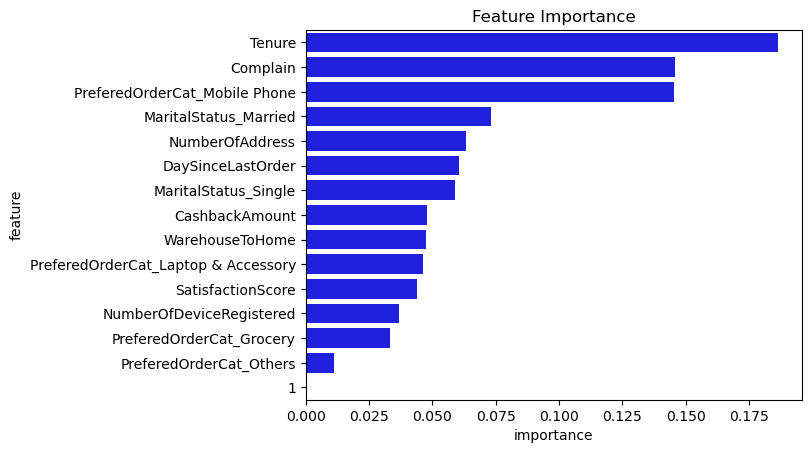

In [56]:
# membuat barplot untuk melakukan visualisasi terhadap feature importance
sns.barplot(data=imp, y='feature', x='importance', color='b')
plt.title('Feature Importance')

3 Features dengan nilai importance tertinggi atau memiliki pengaruh penting terhadap customer dalam melakukan churn atau tidak berdasarkan feature importance adalah:
- Tenure atau lamanya menjadi customer perusahan e-commerce ini
- Complain atau keluhan dalam satu bulan terakhir
- PreferedOrderCat_Mobile Phone atau kategori pembelian customer dalan satu bulan terakhir

### Shapley Value of Explanations (SHAP)

In [57]:
my_model = xgbc_tuning[-1]
my_data = xgbc_tuning[0].fit_transform(X_train)

# define explainer
explainer = shap.TreeExplainer(
    model = my_model,
    data = my_data
)

# hitung shap value untuk tiap baris di data train
shap_values = explainer.shap_values(my_data)


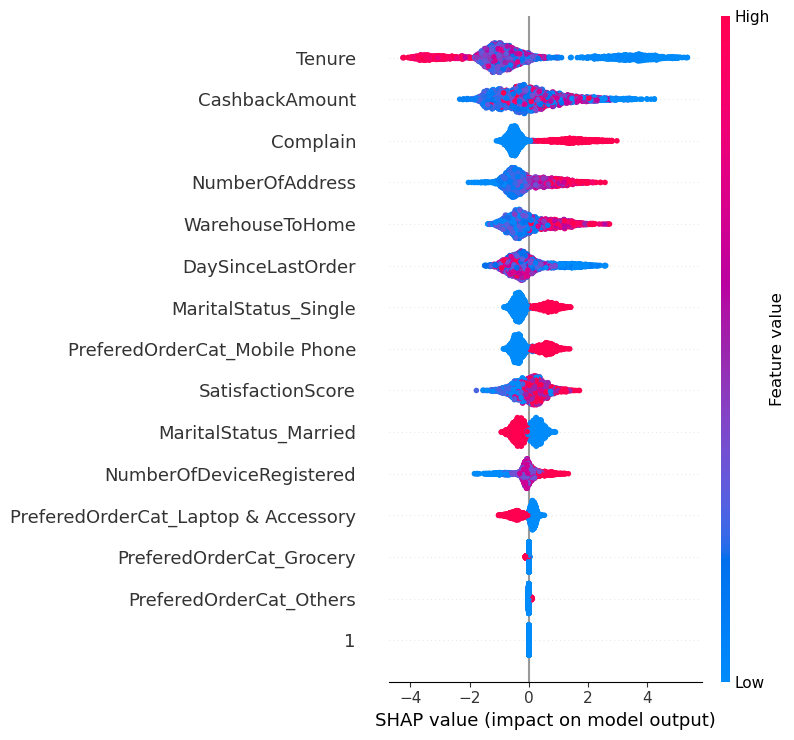

In [58]:
# menampilkan feature yang paling memengaruhi churn
shap.summary_plot(shap_values, my_data, feature_names = feat)

3 Features yang memiliki pengaruh penting terhadap customer dalam melakukan churn atau tidak berdasarkan SHAP adalah:
- Tenure: Semakin lama menjadi customer perusahan e-commerce ini (tenure semakin tinggi), maka customer cenderung tidak melakukan churn. Customer dengan tenure yang semakin kecil, maka customer cenderung melakukan churn.
- CashbackAmount: Semakin rendah jumlah promosi dalam bentuk pengembalian uang (casback amount), maka customer cenderung melakukan churn.
- Complain: Customer yang memberikan keluhan dalam satu bulan terakhir, cenderung melakukan churn.

### Insights of Features Importance & SHAP combined

Melalui explainable ML, baik menggunakan feature importance dan juga SHAP, feature yang paling mempengaruhi customer melakukan churn adalah `Tenure` dan juga `Complain`.

**Tenure**

<AxesSubplot: xlabel='Churn', ylabel='Tenure'>

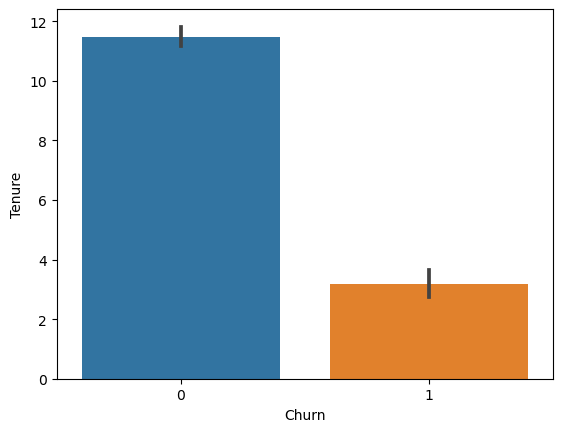

In [59]:
sns.barplot(x='Churn', y='Tenure', data=df)

Hasil dari feature importance dan SHAP yang menunjukkan bahwa tenure merupakan feature yang mempengaruhi custumer dalam melakukan churn atau tidak, didukung juga dengan barplot di atas. Customer dengan rata-rata tenure yang rendah, customer cenderung melakukan churn.

**Complain**

<AxesSubplot: xlabel='Churn', ylabel='Complain'>

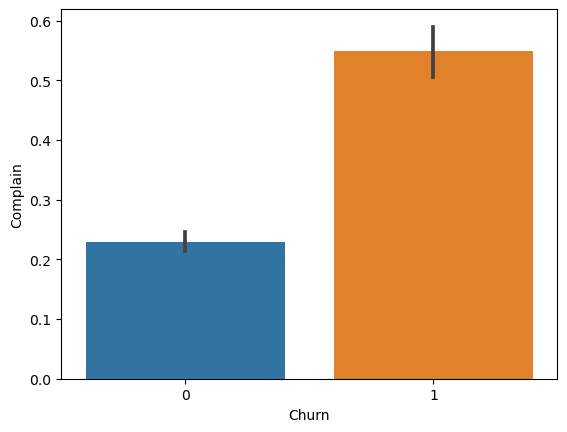

In [60]:
sns.barplot(x='Churn', y='Complain', data=df)

Hasil dari feature importance dan SHAP yang menunjukkan bahwa complain merupakan feature yang mempengaruhi custumer dalam melakukan churn atau tidak, didukung juga dengan barplot di atas. Customer dengan rata-rata memberikan complain kepada perusahaan, cenderung melakukan churn.

---
## **Save Final Model**

### Save with Pickle
Pickle adalah salah satu library yang bisa digunakan untuk menyimpan model Machine Learning yang sudah dibuat.

In [61]:
import pickle

In [62]:
# best model
xgbc_tuning = random_xgbc.best_estimator_
xgbc_tuning

# fit
xgbc_tuning.fit(X, y)

# save with pickle
pickle.dump(xgbc_tuning, open('finalmodel_xgboost.sav', 'wb'))

---
## **Prediction to Customer with Final Model**

### Load Model

In [63]:
model = pickle.load(open('finalmodel_xgboost.sav', 'rb'))
model

Pipeline(steps=[('transformer',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('pipe_impute_robust',
                                                  Pipeline(steps=[('median',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('poly',
                                                                   PolynomialFeatures(degree=1)),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Tenure', 'WarehouseToHome',
                                                   'NumberOfDeviceRegistered',
                                                   'SatisfactionScore',
                                                   'NumberOfAddress',
                  

### Prediction to Customer in Dataset

In [64]:
# customer index 7 yang akan diprediksi
X.iloc[[7], :]

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
7,1.0,11.0,4,Mobile Phone,5,Single,3,0,1.0,154.73


In [65]:
# melakukan predict pada seorang customer

model.predict(X.iloc[[7], :])

# customer index 7 diprediksi akan churn

array([1])

In [66]:
# y actual = 1 (Churn)
# prediksi di atas ternyata benar. Customer index 7 melakukan churn (TP)
y[7]

1

### Prediction to New Customer

In [67]:
# membuat customer baru dengan memasukkan data-data customer baru pada dataframe
new_cust = pd.DataFrame({
    'Tenure':[5],
    'WarehouseToHome':[22],
    'NumberOfDeviceRegistered':[3],
    'PreferedOrderCat':['Fashion'],
    'SatisfactionScore':[3],
    'MaritalStatus':['Single'],
    'NumberOfAddress':[10],
    'Complain':[0],
    'DaySinceLastOrder':[11],
    'CashbackAmount':[155]
})
new_cust

,Tenure,WarehouseToHome,NumberOfDeviceRegistered,PreferedOrderCat,SatisfactionScore,MaritalStatus,NumberOfAddress,Complain,DaySinceLastOrder,CashbackAmount
0,5,22,3,Fashion,3,Single,10,0,11,155


In [68]:
# melakukan predict pada seorang customer baru 
model.predict(new_cust)

# customer baru diprediksi tidak akan melakukan churn

array([0])

---
## **Conclusion and Recommendation**

### Conclusion

- Machine Learning mampu mengatasi masalah yang ada pada perusahaan e-commerce ini, yaitu untuk melakukan prediksi pada customer yang akan melakukan churn. Algoritma machine learning yang digunakan pada model ini adalah XGBoost yang dilakukan tuning sebanyak dua kali, dengan nilai akurasi model sebesar 78% menggunakan f2 score. Model ini mampu menurunkan kerugian perusahaan sebesar 76.59%, dengan menekan angka false negative.
- Berdasarkan explainable machine learning menggunakan feature importance dan SHAP, faktor-faktor yang mempengaruhi customer melakukan churn adalah tenure (lama menjadi customer perusahaan) dan complaint.

### Recommendation

**For Business:**

Customer yang melakukan churn dapat menimbulkan kerugian bagi perusahaan. Oleh karena itu, perusahaan e-commerce perlu menyusun strategi agar dapat tetap menjaga kualitas produk dan pelayanan, serta membuat UX yang user friendly, agar dapat menghindari complaint yang masuk. Selain itu, perusahaan e-commerce perlu menyusun strategi agar dapat menciptakan loyalitas pelanggan, baik dengan melakukan inovasi pada produk yang dipasarkan dan memberikan penawaran yang menarik, sehingga tenure customer semakin tinggi.

Selain itu, perusahaan e-commerce perlu memahami Marketing Funnel. Marketing Funnel adalah sebuah konsep untuk menjelaskan tahapan yang dilalui oleh pelanggan sebelum akhirnya melakukan pembelian produk. Dengan mengetahui dan memahami Marketing Funnel, maka sebuah perusahaan akan lebih mudah untuk mengidentifikasi penyebab pelanggan membatalkan pembelian, sehingga dapat menyusun strategi untuk dapat mengatasinya.

Perusahaan perlu menggunakan machine learning yang sudah dibuat, agar dapat mengurangi kerugian bagi perusahaan dengan memberikan promosi tepat sasaran kepada customer yang akan melakukan churn.

**For Model:**

Akurasi model machine learning yang dibuat terbatas pada range feature:
- Tenure: 0-61 bulan
- Warehouse To Home: 5-127 km
- Number of Device Registered: 1-6 devices
- Number of Address: 1-22 address
- Day since last order: 0-46 hari
- Cashback Amount: 0-324.99 

Oleh karena itu, perlu mengumpulkan lebih banyak data khususnya pada minority class, perlu menambahkan parameter lain dalam hyperparameter tuning, serta perlu ID customer untuk memastikan dan mengetahui data yang duplikat, serta perlu feature lain seperti lama pengiriman produk, ketepatan waktu pengiriman, dan lain-lain.

